In [90]:
import sys
from pyprojroot import here
sys.path.append(str(here()))
import dotenv
import os
import openai
from langchain_openai import ChatOpenAI, AzureChatOpenAI

# Load environment variables from .env file
dotenv.load_dotenv()

# Set Azure OpenAI credentials
AZURE_OPENAI_API_KEY = os.getenv("AZURE_OPENAI_API_KEY")
AZURE_OPENAI_ENDPOINT = os.getenv("AZURE_OPENAI_ENDPOINT")
AZURE_EMBEDDING_DEPLOYMENT_NAME = os.getenv("AZURE_EMBEDDING_DEPLOYMENT_NAME") # Deployment name
AZURE_EMBEDDING_MODEL_NAME = os.getenv("AZURE_EMBEDDING_MODEL_NAME")  # Model name
AZURE_EMBEDDING_MODEL_VERSION = os.getenv("AZURE_EMBEDDING_MODEL_VERSION")  # Model version
AZURE_OPENAI_API_VERSION=os.getenv("AZURE_OPENAI_API_VERSION")

In [91]:

import json
data_dir = here("data/papers/Li-Mn-O")
input_file = os.path.join(data_dir, "d2dt01964g_synthesis_and_challenges.json")

with open(input_file, "r", encoding="utf-8") as f:
    synthesis_data = json.load(f)

challenges_info = synthesis_data.get("challenges_info", [])

# Prepare challenge and solution texts
challenge_texts = [c["challenge"]["description"] + " " + c["challenge"]["type"] + " " + c["challenge"]["impact"] for c in challenges_info]
solution_texts = [c["solution"]["description"] + " " + c["solution"]["methodology"] + " " + c["solution"]["effectiveness"] for c in challenges_info]
materials_names = [c["material"] for c in challenges_info]
stages = [c["stage"] for c in challenges_info]

print("Materials:", materials_names)
print("Stages:", stages)
print("Challenges:", challenge_texts)
print("Solutions:", solution_texts)


Materials: ['Li4Mn5O12', 'Li4Mn5O12', 'LiMn2O4', 'λ-MnO2']
Stages: ['synthesis', 'testing', 'synthesis', 'application']
Challenges: ['Achieving a chemically ordered spinel structure at low synthesis temperatures. structural Low synthesis temperatures may lead to local ionic disorder, where lithium and manganese ions occupy random positions, potentially affecting catalytic performance.', 'Amorphization of the catalyst surface during long-term stability testing. structural Amorphization may reduce the crystallinity of the surface, potentially affecting the long-term catalytic performance.', 'Achieving nanorod morphology with consistent size distribution. morphological Increased size of nanorods due to high-temperature synthesis conditions may reduce surface area and catalytic activity.', 'Lower surface area compared to LiMn2O4, potentially limiting catalytic activity. morphological Reduced surface area may decrease the accessibility of electrolytes to catalytic sites, impacting water oxi

In [92]:
import openai
from openai import AzureOpenAI

# Setup Azure client (new SDK structure)
client = AzureOpenAI(
    api_key=AZURE_OPENAI_API_KEY,
    api_version=AZURE_OPENAI_API_VERSION,
    azure_endpoint=AZURE_OPENAI_ENDPOINT,
)

# Embedding function using the new SDK
def get_embeddings(texts, deployment_name):
    embeddings = []
    for text in texts:
        response = client.embeddings.create(
            input=text,
            model=deployment_name,  # Must match your Azure deployment name
        )
        embeddings.append(response.data[0].embedding)
    return embeddings


In [93]:
challenge_embeddings_openai_embed = get_embeddings(challenge_texts, AZURE_EMBEDDING_DEPLOYMENT_NAME)
solution_embeddings_openai_embed = get_embeddings(solution_texts, AZURE_EMBEDDING_DEPLOYMENT_NAME)


In [94]:
challenge_embeddings_openai_embed

[[0.0004588415613397956,
  0.02461986243724823,
  0.021073848009109497,
  -0.0310647115111351,
  -0.034866902977228165,
  0.03691631183028221,
  -0.013220029883086681,
  -0.021815409883856773,
  -0.0006943718180991709,
  -0.028395088389515877,
  0.024983901530504227,
  0.03670058399438858,
  0.00026376015739515424,
  0.019712070003151894,
  -0.0005860868841409683,
  0.013267220929265022,
  0.024390652775764465,
  0.021694062277674675,
  0.01206049695611,
  0.011251519434154034,
  -0.030525393784046173,
  -0.00891896989196539,
  -0.008952677249908447,
  -0.0004386171349324286,
  -0.011224553920328617,
  -0.022664835676550865,
  0.006643722299486399,
  -0.018323326483368874,
  -0.0275726281106472,
  0.020049143582582474,
  0.018323326483368874,
  -0.0016516611212864518,
  -0.0156941507011652,
  -0.010220074094831944,
  -0.02618388459086418,
  0.00043651042506098747,
  0.011521179229021072,
  -0.027882736176252365,
  0.013307669200003147,
  -0.02785577066242695,
  0.02575243078172207,
  0

# Create embeddings for all challenges, and solutions for Li-Mn-O systems

In [95]:
# prepare the list of all JSON files for research papers
import json
import os
from tqdm.auto import tqdm

data_dir = here("data/papers/Li-Mn-O")

files = os.listdir(data_dir)
files = [f for f in files if f.endswith('_synthesis_and_challenges.json')]

#
challenge_texts = []
solution_texts = []
materials_names = []
stages = []

# Loop through each file and extract the relevant information
for file in tqdm(files):
    input_file = os.path.join(data_dir, file)

    with open(input_file, "r", encoding="utf-8") as f:
        synthesis_data = json.load(f)

    challenges_info = synthesis_data.get("challenges_info", [])

    # Prepare challenge and solution texts
    for c in challenges_info:
        challenge_texts.append(c.get("challenge", {}).get("description", "") + " " + c.get("challenge", {}).get("type", "") + " " + c.get("challenge", {}).get("impact", ""))
        solution_texts.append(c.get("solution", {}).get("description", "") + " " + c.get("solution", {}).get("methodology", "") + " " + c.get("solution", {}).get("effectiveness", ""))
        materials_names.append(c.get("material", ""))
        stages.append(c.get("stage", ""))
    

print("Num. of materials:", len(materials_names), "Materials:", materials_names)
print("Num. of stages:", len(stages), "Stages:", stages)
print("Num. of challenges:", len(challenge_texts), "Challenges:", challenge_texts)
print("Num. of solutions:", len(solution_texts), "Solutions:", solution_texts)

  0%|          | 0/75 [00:00<?, ?it/s]

Num. of materials: 173 Materials: ['Li1.2Ni0.23Co0.12Mn0.5O2', 'Li1.2Ni0.23Co0.12Mn0.5O2', 'Li1.2Ni0.23Co0.12Mn0.5O2', 'Li1.2Ni0.23Co0.12Mn0.5O2', 'LiMn2−xTixO4', 'LiMn2−xTixO4', 'LiMnTiO4', 'LiNiVO4', 'LiMn2O4', 'Zn2SnO4', 'LiMn2O4 (Sample A)', 'LiMn2O4 (Sample A)', 'LiMn2O4', 'LiMn2O4', 'LiMn2O4', 'LiMn2O4', 'LiMn2O4', 'LixMn3−xO4', 'LiMn2O4', 'LiMn2O4', 'Li2MnO3', 'Li2MnO3', 'Li2MnO3', 'LiMn2O4', 'Li1−xMn2+xO4', 'LiMn2O4', 'LiMn2O4', 'LiₓMn₁₊ₓFe₂₋₂ₓO₄', 'LiₓMn₁₊ₓFe₂₋₂ₓO₄', 'LiₓMn₁₊ₓFe₂₋₂ₓO₄', 'LiMn2O4', 'Li4Mn5O12', 'Li4Mn5O12', 'Li4Mn5O12', 'LiCoxMn2−xO4', 'LiCoxMn2−xO4', 'LiCoxMn2−xO4', 'LiMnO2', 'LixMnO2 (x < 0.1)', 'LixMnO2 (x < 0.1)', 'Li1+δMn2O4 (0 ≤ δ ≤ 1)', 'Li1+δMn2O4 (0 ≤ δ ≤ 1)', 'Li1+δMn2O4 (0 ≤ δ ≤ 1)', 'CuMn2O4', 'LiMg0.5Mn1.5O4', 'LiCo0.5Mn1.5O4', 'CuMg0.5Mn1.5O4', 'LiMn2O4', 'LiMn2O4', 'LiMn2O4', 'LiMnO2', 'LiMnO2', 'orthorhombic LiMnO2', 'rock salt Li0.5Mn0.5O', 'spinel LiMn2O4', 'Li1.27Mn1.73O4', 'Protonated MnO2', 'Deuterated MnO2', 'Li2MnO3', 'Li2MnO3', 'Li2Mn1−x

In [96]:
# Create embeddings for all challenges and solutions
challenge_embeddings_openai_embed = get_embeddings(challenge_texts, AZURE_EMBEDDING_DEPLOYMENT_NAME)
solution_embeddings_openai_embed = get_embeddings(solution_texts, AZURE_EMBEDDING_DEPLOYMENT_NAME)


In [97]:
print("Num of embedding vectors in challenges:", len(challenge_embeddings_openai_embed), "shape of each vector:", len(challenge_embeddings_openai_embed[0]))


Num of embedding vectors in challenges: 173 shape of each vector: 1536


⚠️ Challenges with High-Dimensional, Low-Sample-Size Data
Curse of Dimensionality: In high-dimensional spaces, distances between points become less meaningful, making it difficult for clustering algorithms to identify distinct groups.​

Small Sample Size: With only 14 samples, estimating reliable clusters becomes challenging, potentially leading to overfitting or identifying spurious clusters.​

✅ Recommended Approach
To effectively apply Agglomerative Clustering to your dataset, consider the following steps:

1. Dimensionality Reduction
Reduce the dimensionality of your data to mitigate the curse of dimensionality. Options include:​

Principal Component Analysis (PCA): Linear technique that projects data onto directions of maximum variance.​

Uniform Manifold Approximation and Projection (UMAP): Non-linear technique that preserves both local and global data structure, often yielding better clustering results in high-dimensional data.​

t-Distributed Stochastic Neighbor Embedding (t-SNE): Non-linear technique that excels at preserving local structure but may distort global relationships.

In [98]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 components
pca = PCA(n_components=2)
reduced_vectors_PCA = pca.fit_transform(challenge_embeddings_openai_embed)
reduced_vectors_PCA[0]


array([-0.25275564, -0.20023009])

In [99]:
import umap

# Reduce dimensionality to 2 components
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
reduced_vectors_umap = reducer.fit_transform(challenge_embeddings_openai_embed)
reduced_vectors_umap[0]

/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


array([4.6759615, 8.796318 ], dtype=float32)

/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Silhouette Score for t-SNE clustering: 0.40183377
Silhouette Score: 0.40183377


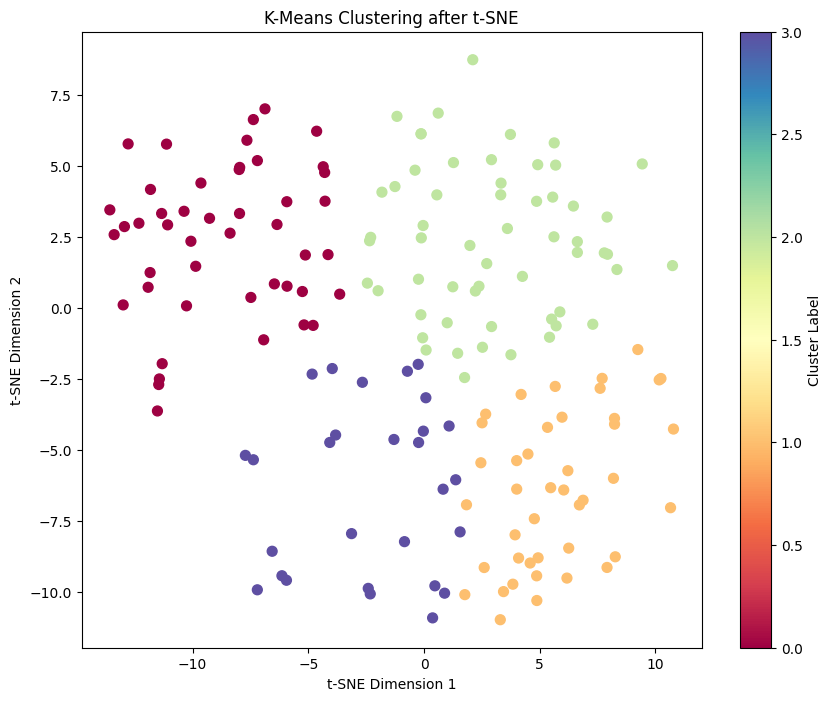

In [105]:
# t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Reduce dimensionality to 2 components using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, metric='cosine')
reduced_vectors_tsne = tsne.fit_transform(np.array(challenge_embeddings_openai_embed))

# Apply KMeans clustering on t-SNE reduced data
kmeans = KMeans(n_clusters=4, random_state=0)
labels_tsne = kmeans.fit_predict(reduced_vectors_tsne)
score = silhouette_score(reduced_vectors_tsne, labels_tsne)
print("Silhouette Score for t-SNE clustering:", score)
print("Silhouette Score:", score)

# Visualize the clusters

plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors_tsne[:, 0], reduced_vectors_tsne[:, 1], c=labels_tsne, cmap='Spectral', s=50)
plt.title('K-Means Clustering after t-SNE')
plt.colorbar(label='Cluster Label')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

scores = []
# Compute silhouette score for different numbers of clusters
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(reduced_vectors_PCA)
    score = silhouette_score(reduced_vectors_PCA, labels)
    scores.append(score)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")

Number of clusters: 2, Silhouette Score: 0.36412653290366526
Number of clusters: 3, Silhouette Score: 0.4125154270862255
Number of clusters: 4, Silhouette Score: 0.3747429309140724
Number of clusters: 5, Silhouette Score: 0.35695998137229856
Number of clusters: 6, Silhouette Score: 0.39273212264549917
Number of clusters: 7, Silhouette Score: 0.3780880270868974
Number of clusters: 8, Silhouette Score: 0.3545301770578756
Number of clusters: 9, Silhouette Score: 0.363849781213491


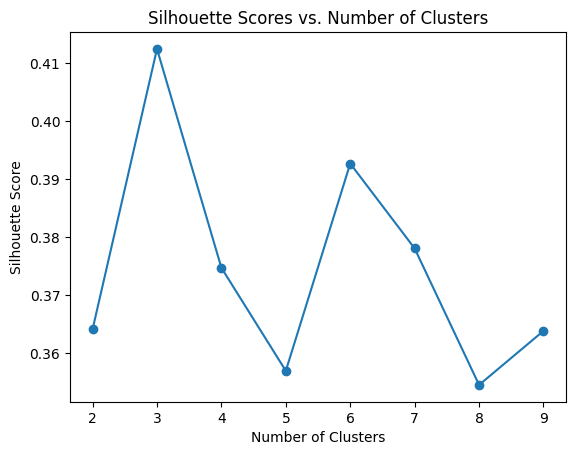

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(2, 10), scores, marker='o')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [20]:
from sklearn.metrics import silhouette_score
scores = []
# Compute silhouette score for different numbers of clusters
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(reduced_vectors_umap)
    score = silhouette_score(reduced_vectors_umap, labels)
    scores.append(score)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")

Number of clusters: 2, Silhouette Score: 0.44786494970321655
Number of clusters: 3, Silhouette Score: 0.3757545053958893
Number of clusters: 4, Silhouette Score: 0.45325323939323425
Number of clusters: 5, Silhouette Score: 0.41755446791648865
Number of clusters: 6, Silhouette Score: 0.39340782165527344
Number of clusters: 7, Silhouette Score: 0.3900996744632721
Number of clusters: 8, Silhouette Score: 0.357751727104187
Number of clusters: 9, Silhouette Score: 0.348481684923172


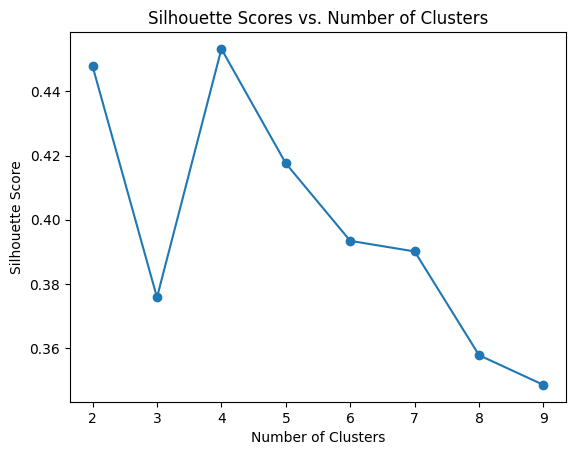

In [21]:
import matplotlib.pyplot as plt

plt.plot(range(2, 10), scores, marker='o')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# KMeans clustering


In [22]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model
kmeans.fit(reduced_vectors_PCA)

# Predict the clusters
labels = kmeans.predict(reduced_vectors_PCA)

# Cluster centers
centroids = kmeans.cluster_centers_



In [23]:
print(centroids.shape)
print(centroids)
print(labels)

challenge = 0
for i in range(len(labels)):
    if labels[i] == challenge:
        print("Challenge:", challenge_texts[i])

(4, 2)
[[ 0.18922554 -0.10247485]
 [-0.13144823 -0.08617706]
 [-0.03947959  0.12760514]
 [ 0.07689948  0.02045092]]
[1 1 1 0 3 2 3 3 1 3 1 1 2 2 1 3 2 3 1 0 3 0 3 2 1 3 0 3 3 3 2 2 0 1 2 1 2
 2 0 3 0 0 1 3 2 2 3 2 0 2 2 3 2 1 3 2 2 0 3 0 3 1 3 1 3 0 3 0 0 2 2 2 2 2
 2 0 2 1 2 0 2 1 2 1 2 1 2 1 1 0 3 2 0 1 0 3 3 3 1 1 1 3 1 0 0 2 2 1 1 2 1
 2 0 2 1 1 1 1 3 2 2 2 3 0 0 1 1 1 3 1 0 3 3 3 3 3 2 1 1 3 1 0 0 2 2 3 1 1
 2 3 2 1 1 1 2 1 2 0 2 3 3 2 1 1 3 2 1 2 2 3 0 1 1]
Challenge: Difficulty in determining the crystallographic position of low-level dopants (F and Cr). procedural Complicates the understanding of the relationship between doping and electrochemical performance.
Challenge: Structural phase transition from cubic to tetragonal at 290 K in stoichiometric samples. structural Causes anomalies in resistivity and susceptibility, potentially affecting material stability and performance.
Challenge: Discrepancies in modeling the experimental X-ray diffraction pattern profile and interpreti

In [24]:
challenge = 1
for i in range(len(labels)):
    if labels[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: Severe capacity fade during cycling. performance Reduces the long-term energy storage capability of lithium-ion batteries, limiting their practical application.
Challenge: Voltage decay during cycling, thought to originate from a transformation to a spinel-like phase at 3V. structural Voltage decay reduces the energy density and efficiency of the battery over time.
Challenge: Poor cycle performance of F-doped material, retaining only ∼70% capacity after 200 cycles. performance Limits the long-term usability of the material in practical battery applications.
Challenge: Phase transition observed around 280–290 K with hysteresis, leading to a dramatic drop in conductivity. structural Limits the material's performance as a cathode in rechargeable Li-ion batteries, particularly at lower temperatures.
Challenge: Capacity fading during cycling occurs in the higher charge voltage range (x < 0.45). structural This problem limits the material's long-term performance and reliability as

In [25]:
challenge = 2
for i in range(len(labels)):
    if labels[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: Substitution by non-magnetic d0 Ti4+ ions weakens the magnetic interactions between manganese ions. magnetic Weakening of magnetic interactions reduces the material's magnetic moment and affects its performance in applications requiring strong magnetic properties.
Challenge: Formation of Mn3O4 impurity during synthesis. chemical The Mn3O4 impurity degrades the electrochemical performance as it is not electrochemically active in the same voltage range as LiMn2O4.
Challenge: Difficulty in detecting and quantifying Mn3O4 impurity due to structural similarity with LiMn2O4. structural Undetected Mn3O4 impurities can lead to inaccurate assessment of material purity and performance.
Challenge: Uncertainty in the experimentally-determined oxidation degree of manganese ions. chemical This uncertainty complicates the precise determination of the spinel unit-cell content, which is critical for understanding the material's structure and properties.
Challenge: Formation of tetragonal spi

In [26]:
challenge = 3
for i in range(len(labels)):
    if labels[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: The ordered structural model with lithium in tetrahedral 8a site and manganese and titanium in octahedral 16d site did not give satisfactory results for x ≥ 0.5. structural The inability to accurately model the cationic distribution affects the understanding of the material's structural properties and its potential applications.
Challenge: Solid-state synthesis resulted in high porosity and poor connectivity between well-sintered agglomerates. procedural High porosity and poor connectivity negatively affect the material's electrical conductivity and overall performance.
Challenge: Difficulty in achieving long-range cation ordering due to weak electrostatic repulsion between Li+ and Ni2+. chemical Limits the ability to synthesize a long-range ordered phase, which may affect material properties and performance.
Challenge: No long-range cation-ordered phase observed despite similar valence states of Sn4+ and Ti4+. chemical Limits the ability to achieve desired structural proper

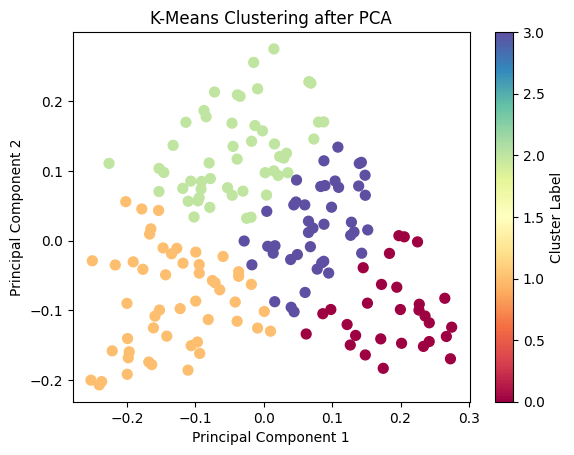

In [27]:
import matplotlib.pyplot as plt

plt.scatter(reduced_vectors_PCA[:, 0], reduced_vectors_PCA[:, 1], c=labels, cmap='Spectral', s=50)
plt.title('K-Means Clustering after PCA')
plt.colorbar(label='Cluster Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [28]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluate clustering
silhouette = silhouette_score(reduced_vectors_PCA, labels)
davies_bouldin = davies_bouldin_score(reduced_vectors_PCA, labels)
calinski_harabasz = calinski_harabasz_score(reduced_vectors_PCA, labels)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.37474242044442535
Davies-Bouldin Index: 0.8885286653807021
Calinski-Harabasz Index: 159.05941795659493


1. Silhouette Score (0.3935)
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1:​
DZone
+3
Wikipedia
+3
Analytics Vidhya
+3

> 0.7: Strong structure

0.5 – 0.7: Reasonable structure

0.25 – 0.5: Weak structure

< 0.25: No substantial structure​
Wikipedia
mishasv.com
+6
Wikipedia
+6
Wikipedia
+6
Communalytic
+8
Cross Validated
+8
Analytics Yogi
+8

A score of 0.3935 falls into the "weak structure" category, indicating that while there is some clustering structure, it's not particularly strong. ​

2. Davies-Bouldin Index (0.4722)
The Davies-Bouldin Index evaluates the average similarity between each cluster and its most similar one, considering both cluster dispersion and separation. Lower values indicate better clustering.​
GPTutorPro

A score of 0.4722 is relatively low, suggesting that the clusters are compact and well-separated, which is favorable. ​
GeeksforGeeks

3. Calinski-Harabasz Index (14.03)
The Calinski-Harabasz Index assesses cluster dispersion; higher values signify better-defined clusters. However, this index is sensitive to the dataset's size and dimensionality.​

A score of 14.03 is moderate. Without a benchmark or comparison to other clustering solutions on the same dataset, it's challenging to determine its adequacy.

In [29]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model
kmeans.fit(reduced_vectors_umap)

# Predict the clusters
labels = kmeans.predict(reduced_vectors_umap)

# Cluster centers
centroids = kmeans.cluster_centers_



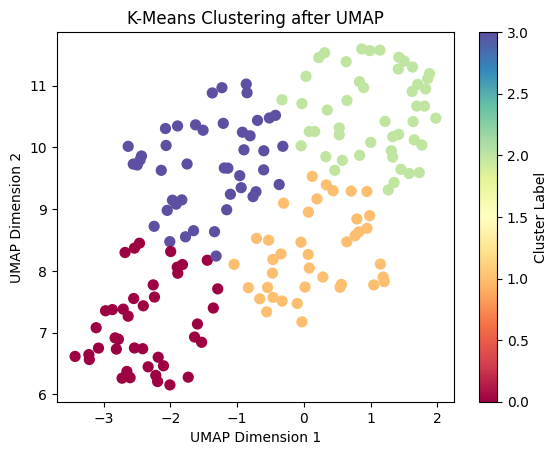

In [30]:
import matplotlib.pyplot as plt

plt.scatter(reduced_vectors_umap[:, 0], reduced_vectors_umap[:, 1], c=labels, cmap='Spectral', s=50)
plt.title('K-Means Clustering after UMAP')
plt.colorbar(label='Cluster Label')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [31]:
challenge = 0
for i in range(len(labels)):
    if labels[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: Difficulty in determining the crystallographic position of low-level dopants (F and Cr). procedural Complicates the understanding of the relationship between doping and electrochemical performance.
Challenge: The ordered structural model with lithium in tetrahedral 8a site and manganese and titanium in octahedral 16d site did not give satisfactory results for x ≥ 0.5. structural The inability to accurately model the cationic distribution affects the understanding of the material's structural properties and its potential applications.
Challenge: Difficulty in achieving long-range cation ordering due to weak electrostatic repulsion between Li+ and Ni2+. chemical Limits the ability to synthesize a long-range ordered phase, which may affect material properties and performance.
Challenge: No long-range cation-ordered phase observed despite similar valence states of Sn4+ and Ti4+. chemical Limits the ability to achieve desired structural properties for specific applications.
Chall

In [32]:
challenge = 1
for i in range(len(labels)):
    if labels[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: Presence of spinel-type defects at the surface of particles synthesized at high temperatures. chemical Surface defects can alter the material's electrochemical properties and reduce its performance in battery applications.
Challenge: Formation of tetragonal spinel phases during high-temperature synthesis. structural The tetragonal distortion affects the material's stability and electrochemical performance, which is critical for its application in lithium-ion batteries.
Challenge: Sensitivity of phase transitions to lithium deficiency. chemical Even a small lithium deficit (0.02 Li) can induce phase transitions, which may compromise the material's performance and reliability in battery applications.
Challenge: Difficulty in synthesizing high-quality single crystals of spinel-type LiMn2O4. procedural The lack of high-quality single crystals hinders precise structural investigations and understanding of the material's properties.
Challenge: Formation of single-phase spinels req

In [33]:
challenge = 2
for i in range(len(labels)):
    if labels[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: Severe capacity fade during cycling. performance Reduces the long-term energy storage capability of lithium-ion batteries, limiting their practical application.
Challenge: Voltage decay during cycling, thought to originate from a transformation to a spinel-like phase at 3V. structural Voltage decay reduces the energy density and efficiency of the battery over time.
Challenge: Poor cycle performance of F-doped material, retaining only ∼70% capacity after 200 cycles. performance Limits the long-term usability of the material in practical battery applications.
Challenge: Phase transition observed around 280–290 K with hysteresis, leading to a dramatic drop in conductivity. structural Limits the material's performance as a cathode in rechargeable Li-ion batteries, particularly at lower temperatures.
Challenge: Capacity fading during cycling occurs in the higher charge voltage range (x < 0.45). structural This problem limits the material's long-term performance and reliability as

HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) to cluster challenge and solution embeddings. HDBSCAN is particularly effective for datasets with clusters of varying densities and can identify noise points (outliers) that don't belong to any cluster.

In [36]:
# Initialize HDBSCAN with desired parameters
import hdbscan
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=3,       # Minimum size of clusters; adjust as needed
    min_samples=1,            # Minimum samples in a neighborhood for a point to be a core point
    metric='euclidean',       # Distance metric
    cluster_selection_method='eom'  # Method to select clusters
)

# Fit the model to your embeddings
labels_hdbscan = clusterer.fit_predict(reduced_vectors_PCA)
# Get the cluster labels
print(labels_hdbscan)



[ 1  5  2 15 31 27 22 29  5 31  2 14  7 12 16 23 12 29  9  8  8 -1 -1 17
 25 -1  3 -1 24  8 -1 -1 15  4 11  5 11 11 19 22 -1 15 25 24  0  0 -1  0
 18 27 10 31 16 26 27  6 -1 -1 30  3  8 14 23  2 22 19 23 19 18 17 11 11
 -1 -1 21 -1 11  1 11 15 11  4 -1 -1 21  5  6  9  9 -1 24 -1  3 16 15 23
 31 29 26  1  4 13  5 15 19 10  7  2  5 11 16  6  3 11  2 -1 -1 20 14 12
 21  7 24 18 -1 20 13 -1 24 13 15  8 31 30  8 17 28 -1 -1 14  5 -1 -1  7
 17 30  2  4 28 31 10  9 14 26 28 13 27 18 28 14 22 11 25 13 14 16 20 27
 16 31 15  2 20]


/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


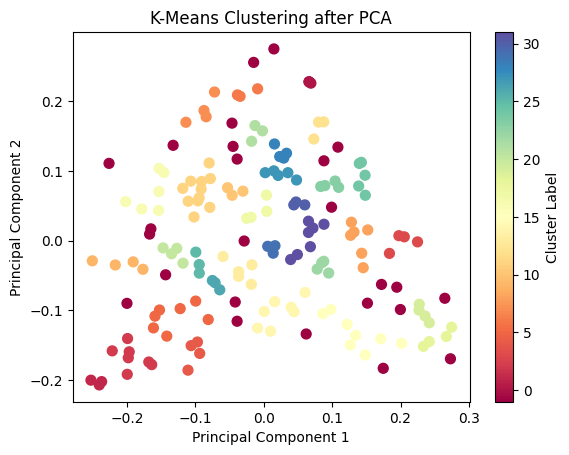

In [37]:
import matplotlib.pyplot as plt

plt.scatter(reduced_vectors_PCA[:, 0], reduced_vectors_PCA[:, 1], c=labels_hdbscan, cmap='Spectral', s=50)
plt.title('K-Means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [38]:
import hdbscan

# Try different combinations
for min_cluster_size in range(2, 6):
    for min_samples in range(1, min_cluster_size + 1):
        clusterer = hdbscan.HDBSCAN(
            min_cluster_size=min_cluster_size,
            min_samples=min_samples,
            metric='euclidean',
            cluster_selection_method='eom'
        )
        labels = clusterer.fit_predict(challenge_embeddings)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        print(f"min_cluster_size: {min_cluster_size}, min_samples: {min_samples}, "
              f"Clusters: {n_clusters}, Noise points: {n_noise}")


NameError: name 'challenge_embeddings' is not defined

/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


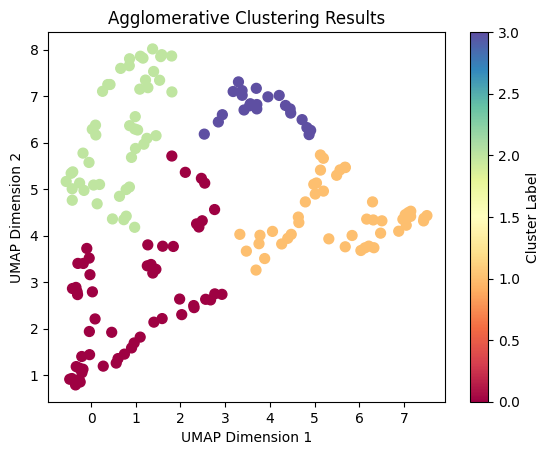

In [39]:
import umap
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Reduce dimensionality
reducer = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(reduced_vectors_PCA)

# Apply Agglomerative Clustering
clusterer = AgglomerativeClustering(n_clusters=4, linkage='average')
labels_agglomerative = clusterer.fit_predict(embedding_2d)

# Visualization
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=labels_agglomerative, cmap='Spectral', s=50)
plt.title('Agglomerative Clustering Results')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [40]:
challenge = 0
for i in range(len(labels_agglomerative)):
    if labels_agglomerative[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: Difficulty in determining the crystallographic position of low-level dopants (F and Cr). procedural Complicates the understanding of the relationship between doping and electrochemical performance.
Challenge: Solid-state synthesis resulted in high porosity and poor connectivity between well-sintered agglomerates. procedural High porosity and poor connectivity negatively affect the material's electrical conductivity and overall performance.
Challenge: Difficulty in achieving long-range cation ordering due to weak electrostatic repulsion between Li+ and Ni2+. chemical Limits the ability to synthesize a long-range ordered phase, which may affect material properties and performance.
Challenge: Structural instability during lithium extraction leads to peak splitting in XRD patterns at higher charge depths (x = 0.25). structural This instability indicates a transition from a two-phase to a one-phase structure, which contributes to capacity fading.
Challenge: Difficulty in determin

In [41]:
challenge = 1
for i in range(len(labels_agglomerative)):
    if labels_agglomerative[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: Severe capacity fade during cycling. performance Reduces the long-term energy storage capability of lithium-ion batteries, limiting their practical application.
Challenge: Voltage decay during cycling, thought to originate from a transformation to a spinel-like phase at 3V. structural Voltage decay reduces the energy density and efficiency of the battery over time.
Challenge: Poor cycle performance of F-doped material, retaining only ∼70% capacity after 200 cycles. performance Limits the long-term usability of the material in practical battery applications.
Challenge: Phase transition observed around 280–290 K with hysteresis, leading to a dramatic drop in conductivity. structural Limits the material's performance as a cathode in rechargeable Li-ion batteries, particularly at lower temperatures.
Challenge: Capacity fading during cycling occurs in the higher charge voltage range (x < 0.45). structural This problem limits the material's long-term performance and reliability as

In [42]:
challenge = 2
for i in range(len(labels_agglomerative)):
    if labels_agglomerative[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: The ordered structural model with lithium in tetrahedral 8a site and manganese and titanium in octahedral 16d site did not give satisfactory results for x ≥ 0.5. structural The inability to accurately model the cationic distribution affects the understanding of the material's structural properties and its potential applications.
Challenge: Substitution by non-magnetic d0 Ti4+ ions weakens the magnetic interactions between manganese ions. magnetic Weakening of magnetic interactions reduces the material's magnetic moment and affects its performance in applications requiring strong magnetic properties.
Challenge: No long-range cation-ordered phase observed despite similar valence states of Sn4+ and Ti4+. chemical Limits the ability to achieve desired structural properties for specific applications.
Challenge: Formation of Mn3O4 impurity during synthesis. chemical The Mn3O4 impurity degrades the electrochemical performance as it is not electrochemically active in the same voltag

In [43]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluate clustering
silhouette = silhouette_score(reduced_vectors_PCA, labels_agglomerative)
davies_bouldin = davies_bouldin_score(reduced_vectors_PCA, labels_agglomerative)
calinski_harabasz = calinski_harabasz_score(reduced_vectors_PCA, labels_agglomerative)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.3289840661566085
Davies-Bouldin Index: 0.839089182247667
Calinski-Harabasz Index: 131.5400574424726


# Other embedding models

other embedding models that are more suitable for scientific text. Here are some options:

1. SciBERT
Description: SciBERT is a BERT-based model trained on scientific text, including papers from Semantic Scholar.
Use Case: It is specifically designed for scientific and technical domains, making it a good choice for embedding scientific challenges and solutions.


In [59]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load SciBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
model = AutoModel.from_pretrained("allenai/scibert_scivocab_uncased")

# Function to get embeddings
def get_sci_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
            # Use the [CLS] token embedding
            embeddings.append(outputs.last_hidden_state[:, 0, :].squeeze().numpy())
    return embeddings

# Example usage
challenge_embeddings_scibert = get_sci_embeddings(challenge_texts)
solution_embeddings_scibert = get_sci_embeddings(solution_texts)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [60]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 components
pca = PCA(n_components=2)
reduced_vectors_PCA_scibert = pca.fit_transform(challenge_embeddings_scibert)
reduced_vectors_PCA_scibert[0]

array([-0.20321822, -0.35377316])

In [62]:
import umap

# Reduce dimensionality to 2 components
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
reduced_vectors_umap_scibert = reducer.fit_transform(challenge_embeddings_scibert)
reduced_vectors_umap_scibert[0]

/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


array([12.010628 ,  5.4182577], dtype=float32)

In [65]:
from sklearn.metrics import silhouette_score
scores_scibert = []
# Compute silhouette score for different numbers of clusters
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(reduced_vectors_PCA_scibert)
    score = silhouette_score(reduced_vectors_PCA_scibert, labels)
    scores_scibert.append(score)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")

Number of clusters: 2, Silhouette Score: 0.42215272325220177
Number of clusters: 3, Silhouette Score: 0.49603568978771373
Number of clusters: 4, Silhouette Score: 0.5002188228782743
Number of clusters: 5, Silhouette Score: 0.4173917736600555
Number of clusters: 6, Silhouette Score: 0.4185239664184955
Number of clusters: 7, Silhouette Score: 0.39495730625792774
Number of clusters: 8, Silhouette Score: 0.3627759907511732
Number of clusters: 9, Silhouette Score: 0.36062929771302843


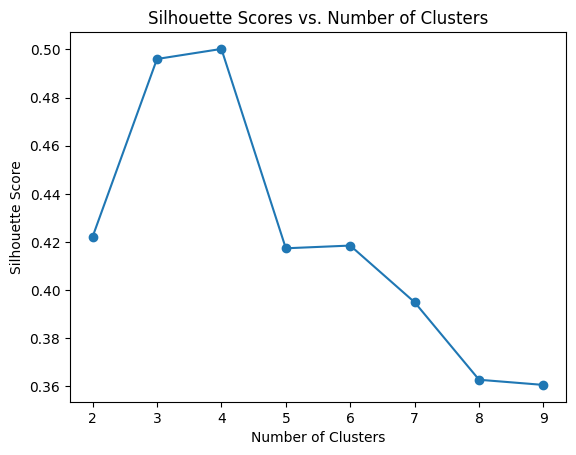

In [66]:
import matplotlib.pyplot as plt

plt.plot(range(2, 10), scores_scibert, marker='o')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [70]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
# Compute silhouette score for different numbers of clusters

# Evaluate clustering
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(reduced_vectors_PCA_scibert)
    silhouette = silhouette_score(reduced_vectors_PCA_scibert, labels)
    davies_bouldin = davies_bouldin_score(reduced_vectors_PCA_scibert, labels)
    calinski_harabasz = calinski_harabasz_score(reduced_vectors_PCA_scibert, labels)
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)
    calinski_harabasz_scores.append(calinski_harabasz)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette}, Davies-Bouldin Index: {davies_bouldin}, Calinski-Harabasz Index: {calinski_harabasz}")
    # print(f"Silhouette Score: {silhouette}")
    # print(f"Davies-Bouldin Index: {davies_bouldin}")
    # print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Number of clusters: 2, Silhouette Score: 0.42215272325220177, Davies-Bouldin Index: 0.9341002204994451, Calinski-Harabasz Index: 131.55709755995514
Number of clusters: 3, Silhouette Score: 0.49603568978771373, Davies-Bouldin Index: 0.683749007363236, Calinski-Harabasz Index: 219.3909150694746
Number of clusters: 4, Silhouette Score: 0.5002188228782743, Davies-Bouldin Index: 0.6771406726283784, Calinski-Harabasz Index: 224.8179653832529
Number of clusters: 5, Silhouette Score: 0.4173917736600555, Davies-Bouldin Index: 0.8525007270940013, Calinski-Harabasz Index: 211.79940955854036
Number of clusters: 6, Silhouette Score: 0.4185239664184955, Davies-Bouldin Index: 0.8120396716258925, Calinski-Harabasz Index: 197.98391253749077
Number of clusters: 7, Silhouette Score: 0.39495730625792774, Davies-Bouldin Index: 0.7992272276305935, Calinski-Harabasz Index: 201.8219933011369
Number of clusters: 8, Silhouette Score: 0.3627759907511732, Davies-Bouldin Index: 0.8732162569493518, Calinski-Harabas

In [72]:
from sklearn.metrics import silhouette_score
scores_umap_scibert = []
# Compute silhouette score for different numbers of clusters
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(reduced_vectors_umap_scibert)
    score = silhouette_score(reduced_vectors_umap_scibert, labels)
    scores_umap_scibert.append(score)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")

Number of clusters: 2, Silhouette Score: 0.45748892426490784
Number of clusters: 3, Silhouette Score: 0.4891713857650757
Number of clusters: 4, Silhouette Score: 0.4809879958629608
Number of clusters: 5, Silhouette Score: 0.4132201671600342
Number of clusters: 6, Silhouette Score: 0.39000359177589417
Number of clusters: 7, Silhouette Score: 0.4080441892147064
Number of clusters: 8, Silhouette Score: 0.38391396403312683
Number of clusters: 9, Silhouette Score: 0.40087854862213135


# KMeans clustering

In [88]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model
kmeans.fit(reduced_vectors_PCA_scibert)

# Predict the clusters
labels = kmeans.predict(reduced_vectors_PCA_scibert)

# Cluster centers
centroids = kmeans.cluster_centers_



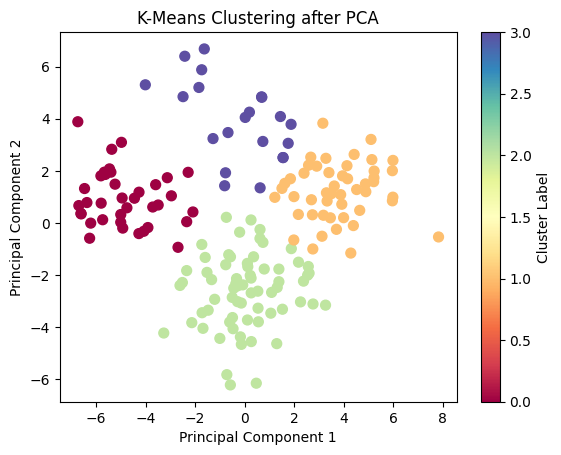

In [89]:
import matplotlib.pyplot as plt

plt.scatter(reduced_vectors_PCA_scibert[:, 0], reduced_vectors_PCA_scibert[:, 1], c=labels, cmap='Spectral', s=50)
plt.title('K-Means Clustering after PCA')
plt.colorbar(label='Cluster Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [87]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluate clustering
silhouette = silhouette_score(reduced_vectors_PCA_scibert, labels)
davies_bouldin = davies_bouldin_score(reduced_vectors_PCA_scibert, labels)
calinski_harabasz = calinski_harabasz_score(reduced_vectors_PCA_scibert, labels)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.49603568978771373
Davies-Bouldin Index: 0.683749007363236
Calinski-Harabasz Index: 219.3909150694746


# Clustering solutions